###   AIDI-1002 -F23 Final Exam

#### Please rename the workbook before submitting to yourname_studentid.ipynb

In [1]:
# !!!!! YOU ARE ONLY ALLOWED to USE THE FOLLOWING LIBRARIES !!!!!
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# provide your personal information. 
# IMPORTANT !!!!. Please make sure to provide the correct student_id here
name = "Sairaj Udayshankar"
student_id = "100865420" 

In [3]:
# run the following statements/commands
my_id_char_list = list(student_id)
my_id_int_list =  [int(i) for i in my_id_char_list]
my_id_total = sum(my_id_int_list)
my_label_col = my_id_total % 10
f"My file number is {my_label_col}"

'My file number is 6'

In [4]:
# load the csv to a dataframe (df)
df = pd.read_csv("auto_data_exam.csv")

In [5]:
#display the shape
# IMPORTANT !!!!. The number of rows in the feature-set which you are going to use for training
# should have the same number of rows (208) as follow
df.shape

(208, 26)

In [6]:
# datatypes
df.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

In [7]:
# names of columns
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
# The following features and labels are utilized by the model. DON'T DELETE or MODIFY IT !!!!!!!!

label_columns = ['symboling', 'fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location', 'engine-type','num-of-cylinders','fuel-system','length','width','height','make','price']

In [9]:
# your label column

my_label = label_columns[my_label_col]
# This is going to be your label
print(my_label)

engine-location


In [10]:
# your features. DON'T CHANGE THIS CELL !!!!

features = label_columns
features.remove(my_label)
features = features[7:]
# These are the features you are going to use. please drop the rest from dataframe (df) "
print(features)

['num-of-cylinders', 'fuel-system', 'length', 'width', 'height', 'make', 'price']


###    Populate the missing values using 'mean' and 'mode' . DON'T drop rows with missing data

In [11]:
df[features]

,num-of-cylinders,fuel-system,length,width,height,make,price
0,four,mpfi,168.8,64.1,48.8,alfa-romero,13495
1,four,mpfi,168.8,64.1,48.8,alfa-romero,16500
2,six,mpfi,171.2,65.5,52.4,alfa-romero,16500
3,four,mpfi,176.6,66.2,54.3,audi,13950
4,five,mpfi,176.6,66.4,54.3,audi,17450
...,...,...,...,...,...,...,...
203,four,mpfi,188.8,68.9,55.5,volvo,16845
204,four,mpfi,188.8,68.8,55.5,volvo,19045
205,six,mpfi,188.8,68.9,55.5,volvo,21485
206,six,idi,188.8,68.9,55.5,volvo,22470


In [12]:
df[features]=df[features].replace('?', None)

In [13]:
df[features]=df[features].replace('#', None)

In [14]:
df[features]=df[features].replace('_', None)

In [15]:
# Replace all missing values in non-numerical columns with 'mode'  
for column in ['num-of-cylinders', 'fuel-system', 'make']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [16]:
df.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

In [17]:
for column in ['length', 'width', 'height', 'price']:
    df[column] = pd.to_numeric(df[column])

In [18]:
df.dtypes

symboling             object
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base            object
length               float64
width                float64
height               float64
curb-weight           object
engine-type           object
num-of-cylinders      object
engine-size           object
fuel-system           object
bore                  object
stroke                object
compression-ratio     object
horsepower            object
peak-rpm              object
city-mpg              object
highway-mpg           object
price                float64
dtype: object

In [19]:
df['length'].fillna(df['length'].mean())

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
203    188.8
204    188.8
205    188.8
206    188.8
207    188.8
Name: length, Length: 208, dtype: float64

In [20]:
# Replace all missing values in numerical columns with 'mean' value 
for column in ['length', 'width', 'height', 'price']:
    df[column] = df[column].fillna(df[column].mean())

In [21]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'toyota', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'volkswagen', 'volvo'], dtype=object)

In [22]:
# If the column name 'make' is in your feature list, please assign numerical 
# values to each car make name in the following way
# 'alfa-romero': 0.0, 'audi': 0.1, 'bmw': 0.2, ...... and so on
df['make'] = df['make'].replace(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'toyota', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'volkswagen', 'volvo'], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])

In [23]:
df['make']

0      0.0
1      0.0
2      0.0
3      0.1
4      0.1
      ... 
203    2.1
204    2.1
205    2.1
206    2.1
207    2.1
Name: make, Length: 208, dtype: float64

In [24]:
df['fuel-system'].dtype

dtype('O')

In [25]:
# convert rest of the non-numerical features to one-hot-vectors  or numerical values of your choice
# If your target/label is not numerical, you can do the same with your label (One hot Encoding or Numerical mapping)
# Here, YOU ARE NOT ALLOWED TO USED any methods such as getDummies, LabelEncoder, OneHotEncoder, OrdinalEncoder, SimpleImputer or any other method/tool

# 'num-of-cylinders', 'fuel-system', 'make'
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [0, 1, 2, 3, 4, 5, 6])
df['fuel-system'] = df['fuel-system'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], [0, 1, 2, 3, 4, 5, 6, 7])

In [26]:
# print the shape of the features set. The number of rows here should match the original size of the dataset (208 records)
# If the number of rows don't match, please fix that before moving further
df.shape

(208, 26)

In [27]:
features

['num-of-cylinders',
 'fuel-system',
 'length',
 'width',
 'height',
 'make',
 'price']

In [28]:
# assign prepared numerical data to following variables

#X = prepared_features
#y = prepared_labels

X = df[['num-of-cylinders', 'fuel-system', 'length', 'width', 'height', 'make', 'price']]
y = df[['engine-location']]

In [29]:
# create a DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X,y) # you may need to adjust some parameters here

In [30]:
# Calculate the accuracy of your model. The performance (accuracy) of the model is NOT a factor for better marks
clf.score(X,y)

0.9903846153846154

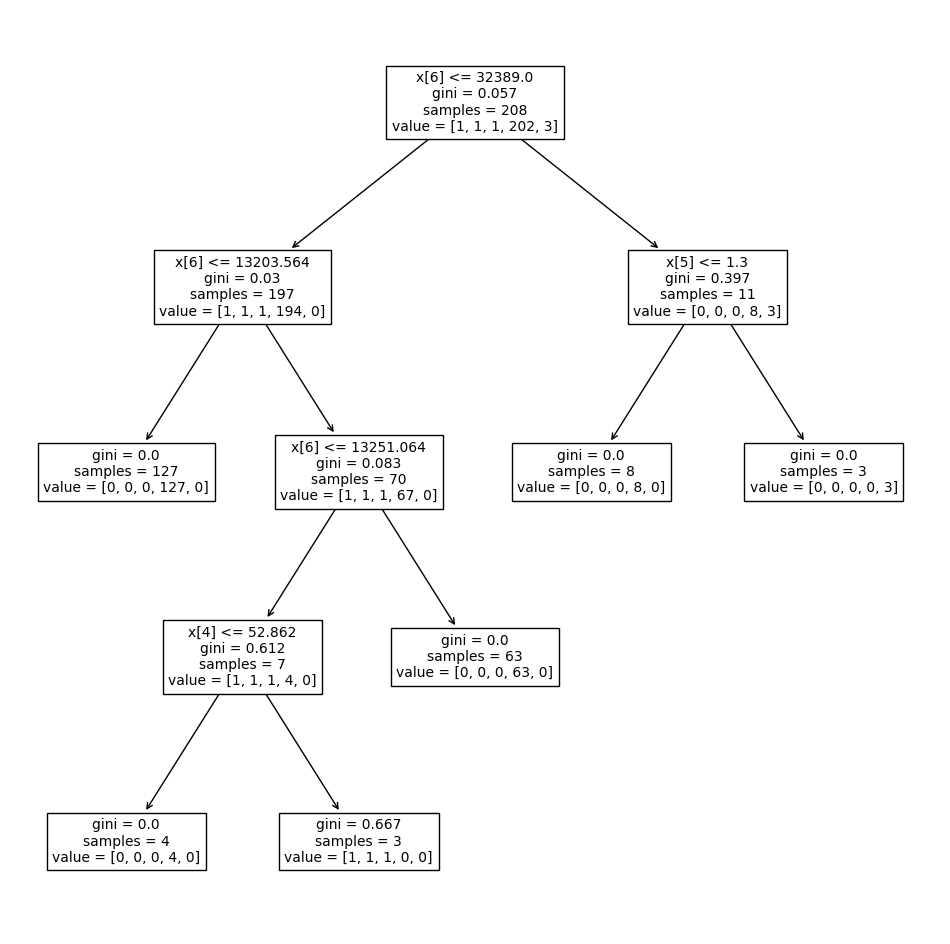

In [31]:
# Run the following code and explain the content in the root node (very top node)

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()